

```
In order to run this code you must:
1. Copy the (this folder: Erika add link) into the main folder of your google drive
1. Enter "other" when prompted

```



In [ ]:
def userpath(user):
    if user in 'ecf':
        userspecific = "/4-CareerWork/1-PhD"
        return userspecific 
    if user in 'other':
        userspecific = ""
        return userspecific 
    else:
        return (user + ' is is not a valid username. Try again. Initials, no caps.')

In [ ]:
#ajt or ecf
user = input("Enter username: ")
user_path =  userpath(user)
general_gdrive = "/content/drive/MyDrive"
print('The user of this session is: ' + user)
print('We will connect you to this google drive location: ' + general_gdrive + user_path)

Enter username: ecf
The user of this session is: ecf
We will connect you to this google drive location: /content/drive/MyDrive/4-CareerWork/1-PhD


In [ ]:
#general drive locations 
user_path =  userpath(user)
general_gdrive = "/content/drive/MyDrive"
folder_name = "/1-SoilGradient/"
path = general_gdrive + user_path + folder_name
r_lib = '1-Code/Rlib/library.tar.gz'
csv_from = '0-Raw/'
csv_to = '1-Processed/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
import glob
import os
import re
import fnmatch

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Magic command interface for interactive work with R in ipython. 
'''
%R and %%R are the line and cell magics, respectively
https://rpy2.github.io/doc/latest/html/interactive.html
'''
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
#Point to zipped R packages(saved in another notebook)
#https://stackoverflow.com/questions/35497069/passing-ipython-variables-as-arguments-to-bash-commands
r_path = '"' + path + r_lib + '"' 
%cp $r_path . 
!tar xf library.tar.gz

tar: Removing leading `/' from member names


In [ ]:
#Add packages to path
%%R
.libPaths('usr/local/lib/R/site-library/')

In [ ]:
github_dir = 'https://raw.githubusercontent.com/WHONDRS-Crowdsourced-Manuscript-Effort/Topic1/main/'
thrsh = '4_gather.thresholds/'
meta = '1_data.cleaning/output/'

In [ ]:
peaks = 'FTICR_peaks_crosstable_rep.merged2_all_em.thres_2022-03-23.csv'
mf = 'FTICR_crosstable_rep.merged2_all_em.thres_2022-05-05.csv'

In [ ]:
peaks_df = pd.read_csv(github_dir + thrsh + peaks)
mf_df = pd.read_csv(github_dir + thrsh + mf)

In [ ]:
file_list  = ['FTICR_crosstable_rep.merged1_all_em.thres_2022-03-23.csv', 'FTICR_crosstable_rep.merged2_all_em.thres_2022-03-23.csv', 
              'FTICR_peaks_crosstable_rep.merged1_all_em.thres_2022-03-23.csv', 
             'FTICR_peaks_crosstable_rep.merged2_all_em.thres_2022-03-23.csv']

sample_meta = github_dir + meta + 'FTICR_meta_all_2022-01-18.csv'
river_meta = github_dir + meta + ' /FTICR_meta_eachriver_2022-01-19.csv'

In [ ]:
#!wget https://github.com/erikafreeman/Topic1/raw/main/1_data.cleaning/output/peaks/peaks_original.zip
#!wget https://github.com/erikafreeman/Topic1/raw/main/1_data.cleaning/output/peaks/peaks_rep.merged2.zip
#!wget https://github.com/erikafreeman/Topic1/raw/main/1_data.cleaning/output/rep.merged1.zip
#!wget https://github.com/erikafreeman/Topic1/raw/main/1_data.cleaning/output/rep.merged2.zip

#!unzip /content/peaks_original.zip -d '/content/drive/My Drive/data'
#!unzip /content/peaks_rep.merged2.zip -d '/content/drive/My Drive/data'
#!unzip /content/rep.merged1.zip  -d '/content/drive/My Drive/data'
#!unzip /content/rep.merged2.zip -d '/content/drive/My Drive/data'

In [ ]:
#run after this cell 

In [ ]:
def molecule_list(colname, flag, df2):
    list=[flag]
    new_df=df2[df2[colname].isin(list)]
    if data_type == 'mf':
        new_list = new_df['MolForm']
    else: 
        new_list = new_df['Mass']
    return new_list 

def generate_lists(threshold_df, flag, flag_class):
    em_col= 'cs.flag.emergent_'+flag

    col_list = threshold_df.columns[threshold_df.columns.str.startswith('cs')].tolist()
    class_list = threshold_df[em_col].unique().tolist()

    d = {}
    for col in col_list:
        for name in class_list:
            d[col , name] = molecule_list(col,name, threshold_df)
    

    if flag_class == 'sat':
        dlist = d.get((em_col, 'Satellite')).tolist()
    elif flag_class == 'cor':
        dlist = d.get((em_col, 'Core')).tolist()
    elif flag_class == 'ib':
        dlist = d.get((em_col, 'In-between')).tolist()
    elif flag_class == 'nan':
        dlist= d.get((em_col, np.nan)).tolist()
    dlist = [str(i) for i in dlist]
    return dlist

def check_df(data_type):
    if data_type == 'mf':
        data_df = mf_df
        return data_df
    else:
        data_df = peaks_df
        return data_df

def get_the_right_file():
    os.chdir(general_gdrive + '/data/')
    if rare == '':
        rar = '[!rar]'
    for file in glob.glob('*' +  'commat*' + merge + '_' + rar + '*'):
        if data_type == 'mf':
            if file.split('_')[1] != 'peaks':
                print(file)
                original_df = pd.read_csv(general_gdrive + '/data/' + file)
        else:
            if file.split('_')[1] == 'peaks':
                print(file)
                original_df = pd.read_csv(general_gdrive + '/data/' + file)
    return original_df

def get_type(df):
    df.set_index('ID', inplace=True)
    if sample_type == 'sed':
        df1 = df[df.index.str.contains('SED')]
        return df1
    if sample_type ==  'water':
        df2= df[df.index.str.contains('SW')]
        return df2

def reduce_filters(df, cols_needed):
    if data_type == 'peaks':
      df.columns= df.columns.str.replace('X', '')
    df_filt = df.filter(regex='|'.join(cols_needed))
    return df_filt

def create_csv(x, y, z, name):
    df = pd.DataFrame(x, index = y, columns=z)
    df['class'] = flag_class
    df['type'] = sample_type
    df['data'] = data_type
    display(df)
    df.to_csv(name)

In [ ]:
merge = 'merged2'
rare = ''

sample_type = 'water' # water or'sed'
data_type = 'peaks' # mf or peaks
flag_class = 'cor' #sat, cor, ib, nan

In [ ]:
flag_list = generate_lists(check_df(data_type), sample_type, flag_class)
df_sample = get_type(get_the_right_file())
flagz = reduce_filters(df_sample, flag_list)
input_df = flagz

Alpha-diversity represents diversity within an ecosystem or sample, in other words, what is there and how much is there in terms of species. 

Several alpha-diversity indices can be calculated. The most commonly used are: 
-Richness (number of specues observed in each sample). 
-Chao1 estimates the total richness 
-Pielou's evenness provides information about the equity in species abundance in each sample, on other words are some species dominating oher or so all species or are the abundances similar
-Shannon's index provides information about both richness and evenness. 

In [ ]:
if data_type == 'peaks':
    input_df.rename(columns=lambda x: x[:8], inplace=True) 

In [ ]:
%%R -i input_df
library(vegan)
data_richness <- estimateR(input_df) #calculate the richness and Chao1 using vegan 
data_shannon <- diversity(input_df, index="shannon")
data_simpson <- diversity(input_df, index="simpson")
data_invsimpson <- diversity(input_df, index="invsimpson")
data_alphadiv <- cbind(t(data_richness), data_shannon,data_simpson, data_invsimpson) #combine all indices into one data table
rnames <- rownames(data_alphadiv)
cnames <- colnames(data_alphadiv)

In [ ]:
%R -o data_alphadiv
%R -o rnames
%R -o cnames
create_csv(data_alphadiv, rnames, cnames, '/content/drive/MyDrive/alpha/'+data_type+'/'+ flag_class+sample_type+data_type+'.csv')

,S.obs,S.chao1,se.chao1,S.ACE,se.ACE,data_shannon,data_simpson,data_invsimpson,class,type,data
SW_S19S.0003,1487.0,1106328.0,57321.876324,NaN,NaN,7.304516,0.999328,1487.0,cor,water,peaks
SW_S19S.0004,1525.0,1163575.0,59533.628150,NaN,NaN,7.329750,0.999344,1525.0,cor,water,peaks
SW_S19S.0005,1833.0,1680861.0,78455.829011,NaN,NaN,7.513709,0.999454,1833.0,cor,water,peaks
SW_S19S.0006,1854.0,1719585.0,79808.188872,NaN,NaN,7.525101,0.999461,1854.0,cor,water,peaks
SW_S19S.0007,1485.0,1103355.0,57206.243285,NaN,NaN,7.303170,0.999327,1485.0,cor,water,peaks
...,...,...,...,...,...,...,...,...,...,...,...
SW_S19S.0096,1427.0,1018878.0,53886.969763,NaN,NaN,7.263330,0.999299,1427.0,cor,water,peaks
SW_S19S.0097,1681.0,1413721.0,68900.499996,NaN,NaN,7.427144,0.999405,1681.0,cor,water,peaks
SW_S19S.0098,1432.0,1026028.0,54170.502134,NaN,NaN,7.266827,0.999302,1432.0,cor,water,peaks
SW_S19S.0099,1847.0,1706628.0,79356.546518,NaN,NaN,7.521318,0.999459,1847.0,cor,water,peaks


In [ ]:
data_type = 'peaks' # mf or peaks

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/alpha/"+data_type+'/')

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

li = []

for filename in all_filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)


In [ ]:
frame.to_csv('/content/drive/MyDrive/all'+data_type+'.csv')

In [ ]:
frame['class'] = frame['class'].fillna('unclass')
display(frame)

,Unnamed: 0,S.obs,S.chao1,se.chao1,S.ACE,se.ACE,data_shannon,data_simpson,data_invsimpson,class,type,data
0,SED_S19S.0001,1284.0,824970.0,45991.585845,NaN,NaN,7.157735,0.999221,1284.0,cor,sed,peaks
1,SED_S19S.0003,1256.0,789396.0,44495.033358,NaN,NaN,7.135687,0.999204,1256.0,cor,sed,peaks
2,SED_S19S.0004,1267.0,803278.0,45080.995888,NaN,NaN,7.144407,0.999211,1267.0,cor,sed,peaks
3,SED_S19S.0006,1249.0,780625.0,44123.480821,NaN,NaN,7.130099,0.999199,1249.0,cor,sed,peaks
4,SED_S19S.0008,1129.0,637885.0,37918.271714,NaN,NaN,7.029088,0.999114,1129.0,cor,sed,peaks
...,...,...,...,...,...,...,...,...,...,...,...,...
559,SW_S19S.0096,744.0,277140.0,20279.976171,NaN,NaN,6.612041,0.998656,744.0,ib,water,peaks
560,SW_S19S.0097,1677.0,1407003.0,68654.670801,NaN,NaN,7.424762,0.999404,1677.0,ib,water,peaks
561,SW_S19S.0098,1202.0,723003.0,41655.850778,NaN,NaN,7.091742,0.999168,1202.0,ib,water,peaks
562,SW_S19S.0099,1599.0,1279200.0,63920.015623,NaN,NaN,7.377134,0.999375,1599.0,ib,water,peaks


In [ ]:
frame = frame.set_index('Unnamed: 0')

,Unnamed: 0,type,class,value
0,SED_S19S.0001,sed,cor,0.298258
1,SED_S19S.0003,sed,cor,0.444130
2,SED_S19S.0004,sed,cor,0.314548
3,SED_S19S.0006,sed,cor,0.400321
4,SED_S19S.0008,sed,cor,0.418148
...,...,...,...,...
559,SW_S19S.0096,water,sat,0.076170
560,SW_S19S.0097,water,sat,0.063842
561,SW_S19S.0098,water,sat,0.095467
562,SW_S19S.0099,water,sat,0.100496


[Text(0, 0.5, 'Relative Abundance')]

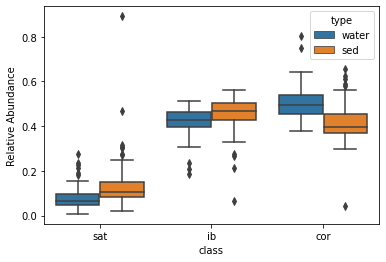

In [ ]:
if data_type =='peaks':
    piv_df= pd.pivot_table(frame, values = 'S.obs', index=['Unnamed: 0', 'type'], columns = 'class').reset_index()
    piv_df['sum'] = piv_df['cor'] + piv_df['ib'] +piv_df['sat']
    piv_df['sat_cor'] = piv_df['sat']/piv_df['cor']
    sumdf = piv_df.copy()
    sumdf[['cor','ib', 'sat']] = sumdf[['cor','ib', 'sat']].div(piv_df['sum'], axis=0)
else:
    piv_df= pd.pivot_table(frame, values = 'S.obs', index=['Unnamed: 0', 'type'], columns = 'class').reset_index()
    piv_df['sum'] = piv_df['cor'] + piv_df['ib'] +piv_df['sat'] + piv_df['unclass']
    piv_df['sat_cor'] = piv_df['sat']/piv_df['cor']
    sumdf = piv_df.copy()
    sumdf[['cor','ib', 'sat', 'unclass']] = sumdf[['cor','ib', 'sat', 'unclass']].div(piv_df['sum'], axis=0)
sumdf = sumdf.drop(['sum', 'sat_cor'], axis=1)
new2 = sumdf.melt(id_vars = ['Unnamed: 0', 'type'])
display(new2)
new2.sort_values('type',inplace=True, ascending=True)
new2.sort_values('class',inplace=True, ascending=False)
ax = sns.boxplot(x='class', y='value', hue='type', data=new2)
ax.set(ylabel='Relative Abundance')

,Unnamed: 0,type,class,value
846,SW_S19S.0004,water,sat_cor,0.149508
881,SW_S19S.0039,water,sat_cor,0.500528
872,SW_S19S.0030,water,sat_cor,0.104778
873,SW_S19S.0031,water,sat_cor,0.166667
874,SW_S19S.0032,water,sat_cor,0.254043
...,...,...,...,...
817,SED_S19S.0070,sed,sat_cor,0.413261
818,SED_S19S.0071,sed,sat_cor,0.169267
819,SED_S19S.0072,sed,sat_cor,0.147224
820,SED_S19S.0073,sed,sat_cor,0.332046


[Text(0, 0.5, 'log (Count Sat:Core)')]

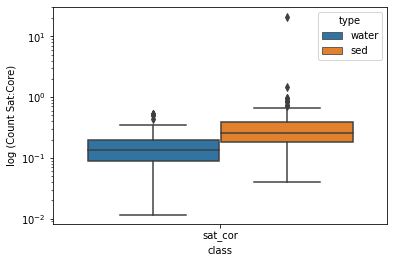

In [ ]:
new = piv_df.melt(id_vars = ['Unnamed: 0', 'type'])
new= new[new['class'].str.contains("sat_cor")]
new.sort_values('type',inplace=True, ascending=False)

display(new)
ax = sns.boxplot(x='class', y='value', hue='type', data=new)
ax.set_yscale("log")
ax.set(ylabel='log (Count Sat:Core)')

[Text(0, 0.5, 'data_invsimpson')]

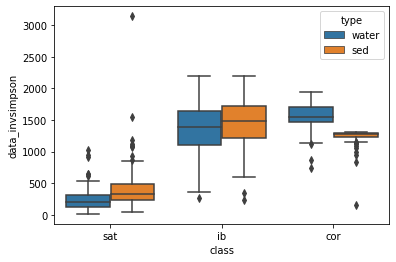

In [ ]:
import seaborn as sns
y_axis = "data_invsimpson" # S.obs	S.chao1	se.chao1	S.ACE	se.ACE	data_shannon	data_simpson	data_invsimpson
frame.sort_values('type',inplace=True, ascending=False)
frame.sort_values('class',inplace=True, ascending=False)
ax = sns.boxplot(x="class", y=y_axis, hue='type', data=frame)
ax.set(ylabel=y_axis)
#ax.set(ylim=(0.98, 1.00))


In [ ]:
from scipy import stats

In [ ]:
def student_ttest_wat_sed(class1, df, col):
    df2= df[df['class'].str.contains(class1)]
    wat = df2[df2['type'].str.contains('water')]
    sed = df2[df2['type'].str.contains('sed')]
    return stats.kruskal(wat[col], sed[col]) 

uc = student_ttest_wat_sed('unclass', frame, 'S.obs')
sat = student_ttest_wat_sed('sat', frame, 'S.obs')
ib = student_ttest_wat_sed('ib', frame, 'S.obs')
cor = student_ttest_wat_sed('cor', frame, 'S.obs')

display(uc, sat, ib, cor)

KruskalResult(statistic=nan, pvalue=nan)

KruskalResult(statistic=20.842585711704757, pvalue=4.986186753158373e-06)

KruskalResult(statistic=1.5339131155966226, pvalue=0.21552610460012692)

KruskalResult(statistic=98.70701832109019, pvalue=2.927627088465424e-23)

In [ ]:
def student_ttest_wat_sed(class1, df, col):
    df2= df[df['class'].str.contains(class1)]
    wat = df2[df2['type'].str.contains('water')]
    sed = df2[df2['type'].str.contains('sed')]
    return stats.ttest_ind(wat[col], sed[col]) 